# Case 2

## Demo

In [2]:
import sympy as sp
import numpy as np
sp.init_printing()

import networkx as nx

In [3]:
D = np.array([
    [1,3,3,1],
    [1,1,2,2]
]).T
D

array([[1, 1],
       [3, 1],
       [3, 2],
       [1, 2]])

In [16]:
ADJ = np.array([
    [0,1,1,1],
    [1,0,1,0],
    [0,1,0,1],
    [1,0,1,0]
])

In [17]:
graph = nx.from_numpy_array(ADJ)

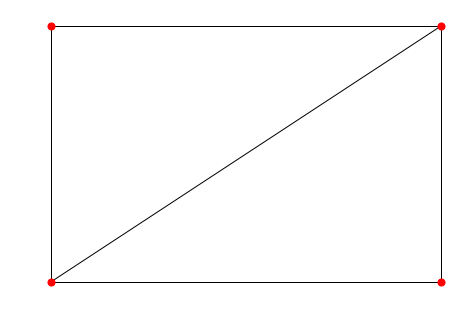

In [18]:
nx.draw(graph,[(x,y) for x,y in D], node_size=50)

## Case

In [19]:
D = np.array([
    [-6.5,-6.5,-6.5,-6.5,-2.5,-2.5,-.75,-.75,3.25,3.25,4.5,4.5,6.5,6.5,6.5,6.5],
    [-2,-2,.5,.5,.5,.5,2,2,2,2,.5,.5,.5,.5,-2,-2],
    [-2.5,2.5,2.5,-2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,-2.5,2.5,2.5,-2.5],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
]).T

In [20]:
ADJ=np.array([ 
    [0,1,0,1, 0,0,0,0, 0,0,0,0, 0,0,0,1],
    [1,0,1,0, 0,0,0,0, 0,0,0,0, 0,0,1,0],
    [0,1,0,1, 0,1,0,0, 0,0,0,0, 0,0,0,0],
    [1,0,1,0, 1,0,0,0, 0,0,0,0, 0,0,0,0],
    
    [0,0,0,1, 0,1,1,0, 0,0,0,0, 0,0,0,0],
    [0,0,1,0, 1,0,0,1, 0,0,0,0, 0,0,0,0],
    [0,0,0,0, 1,0,0,1, 1,0,0,0, 0,0,0,0],
    [0,0,0,0, 0,1,1,0, 0,1,0,0, 0,0,0,0],
    
    [0,0,0,0, 0,0,1,0, 0,1,1,0, 0,0,0,0],
    [0,0,0,0, 0,0,0,1, 1,0,0,1, 0,0,0,0],
    [0,0,0,0, 0,0,0,0, 1,0,0,1, 1,0,0,0],
    [0,0,0,0, 0,0,0,0, 0,1,1,0, 0,1,0,0],
    
    [0,0,0,0, 0,0,0,0, 0,0,1,0, 0,1,0,1],
    [0,0,0,0, 0,0,0,0, 0,0,0,1, 1,0,1,0],
    [0,1,0,0, 0,0,0,0, 0,0,0,0, 0,1,0,1],
    [1,0,0,0, 0,0,0,0, 0,0,0,0, 1,0,1,0]
])


In [21]:
graph = nx.from_numpy_array(ADJ)

In [30]:
import sys

!conda install --yes --prefix {sys.prefix} vtk

Traceback (most recent call last):
  File "/opt/conda/bin/conda", line 7, in <module>
    from conda.cli import main
ModuleNotFoundError: No module named 'conda'


In [27]:
import vtk

def writeObjects(nodeCoords,
                 edges = [],
                 scalar = [], name = '', power = 1,
                 scalar2 = [], name2 = '', power2 = 1,
                 nodeLabel = [],
                 method = 'vtkPolyData',
                 fileout = 'test'):
    """
    Store points and/or graphs as vtkPolyData or vtkUnstructuredGrid.
    Required argument:
    - nodeCoords is a list of node coordinates in the format [x,y,z]
    Optional arguments:
    - edges is a list of edges in the format [nodeID1,nodeID2]
    - scalar/scalar2 is the list of scalars for each node
    - name/name2 is the scalar's name
    - power/power2 = 1 for r~scalars, 0.333 for V~scalars
    - nodeLabel is a list of node labels
    - method = 'vtkPolyData' or 'vtkUnstructuredGrid'
    - fileout is the output file name (will be given .vtp or .vtu extension)
    """

    points = vtk.vtkPoints()
    for node in nodeCoords:
        points.InsertNextPoint(node)

    if edges:
        line = vtk.vtkCellArray()
        line.Allocate(len(edges))
        for edge in edges:
            line.InsertNextCell(2)
            line.InsertCellPoint(edge[0])
            line.InsertCellPoint(edge[1])   # line from point edge[0] to point edge[1]

    if scalar:
        attribute = vtk.vtkFloatArray()
        attribute.SetNumberOfComponents(1)
        attribute.SetName(name)
        attribute.SetNumberOfTuples(len(scalar))
        for i, j in enumerate(scalar):   # i becomes 0,1,2,..., and j runs through scalars
            attribute.SetValue(i,j**power)

    if scalar2:
        attribute2 = vtk.vtkFloatArray()
        attribute2.SetNumberOfComponents(1)
        attribute2.SetName(name2)
        attribute2.SetNumberOfTuples(len(scalar2))
        for i, j in enumerate(scalar2):   # i becomes 0,1,2,..., and j runs through scalar2
            attribute2.SetValue(i,j**power2)

    if nodeLabel:
        label = vtk.vtkStringArray()
        label.SetName('tag')
        label.SetNumberOfValues(len(nodeLabel))
        for i, j in enumerate(nodeLabel):   # i becomes 0,1,2,..., and j runs through scalar
            label.SetValue(i,j)

    if method == 'vtkPolyData':
        polydata = vtk.vtkPolyData()
        polydata.SetPoints(points)
        if edges:
            polydata.SetLines(line)
        if scalar:
            polydata.GetPointData().AddArray(attribute)
        if scalar2:
            polydata.GetPointData().AddArray(attribute2)
        if nodeLabel:
            polydata.GetPointData().AddArray(label)
        writer = vtk.vtkXMLPolyDataWriter()
        writer.SetFileName(fileout+'.vtp')
        writer.SetInputData(polydata)
        writer.Write()
    elif method == 'vtkUnstructuredGrid':
        # caution: ParaView's Tube filter does not work on vtkUnstructuredGrid
        grid = vtk.vtkUnstructuredGrid()
        grid.SetPoints(points)
        if edges:
            grid.SetCells(vtk.VTK_LINE, line)
        if scalar:
            grid.GetPointData().AddArray(attribute)
        if scalar2:
            grid.GetPointData().AddArray(attribute2)
        if nodeLabel:
            grid.GetPointData().AddArray(label)
        writer = vtk.vtkXMLUnstructuredGridWriter()
        writer.SetFileName(fileout+'.vtu')
        writer.SetInputData(grid)
        writer.Write()

ModuleNotFoundError: No module named 'vtk'

In [23]:
# writeObjects(xyz, edges=H.edges(), scalar=degree, name=’degree’, fileout=’network’)

xyz = [(x,y,z) for x,y,z,t in D]

writeObjects(xyz, edges=graph.edges())